In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from cleaning import * 


In [2]:
df = pd.read_csv("./data/clean_measure.csv")



In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,km_total,consume_liter_total,price_per_travel
0,28.0,5.0,26,21.5,12,0,0,0,0,28.0,1.4000,6.900
1,12.0,4.2,30,21.5,13,0,0,0,0,40.0,0.5040,5.796
2,11.2,5.5,38,21.5,15,0,0,0,0,51.2,0.6160,7.590
3,12.9,3.9,36,21.5,14,0,0,0,0,64.1,0.5031,5.382
4,18.5,4.5,46,21.5,15,0,0,0,0,82.6,0.8325,6.210


In [33]:
new_to_plot = df[['distance', 'consume', 'speed', 'temp_outside']].copy()


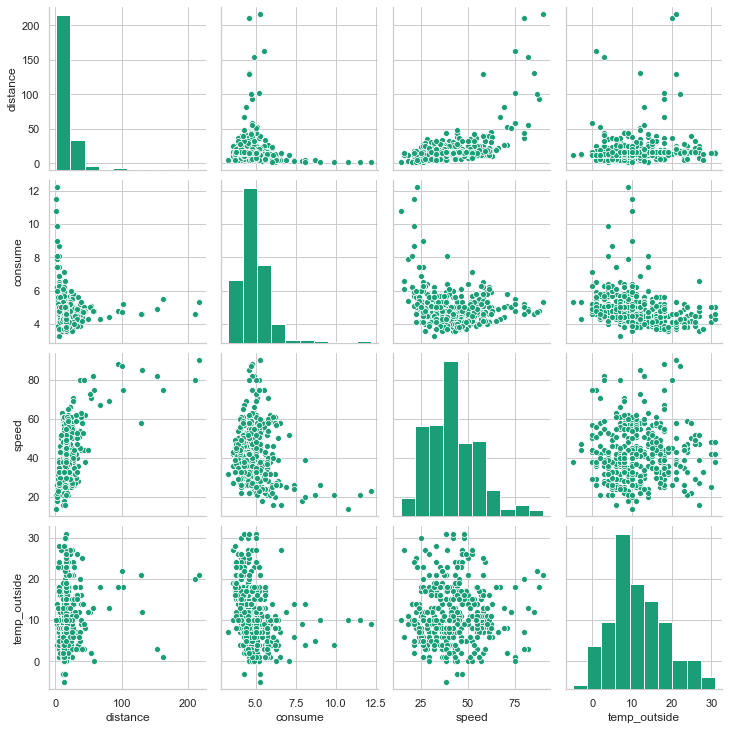

In [34]:
sns.pairplot(new_to_plot)

As we can see, the variables: speed, temp_outside and distance have some right skewness.

In [4]:
df.gas_type.value_counts()

1    228
0    160
Name: gas_type, dtype: int64

How many km can you travel with a liter of each type of gas? let's see with the mean:

In [24]:
df_gas_expense = df.groupby(['gas_type']).agg('mean')
df_gas_expense

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,km_total,consume_liter_total,price_per_travel
gas_type,,,,,,,,,,,
0,21.096250,4.931250,43.506250,21.506250,10.11875,0.043750,0.100000,0.075000,3150.808750,1.008933,6.805125
1,18.639912,4.899123,40.820175,21.072368,12.22807,0.100877,0.140351,0.087719,3846.515351,0.883618,7.152719


Now that we have the means of distance and consume for each type of gas, let's see the distance per liter relation:

In [6]:
df_gas_expense['distance_per_liter'] = ((df_gas_expense.distance / df_gas_expense.consume)).round(3)

In [7]:
df_gas_expense

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,km_total,consume_liter_total,price_per_travel,distance_per_liter
gas_type,,,,,,,,,,,,
0,21.096250,4.931250,43.506250,21.506250,10.11875,0.043750,0.100000,0.075000,3150.808750,1.008933,6.805125,4.278
1,18.639912,4.899123,40.820175,21.072368,12.22807,0.100877,0.140351,0.087719,3846.515351,0.883618,7.152719,3.805


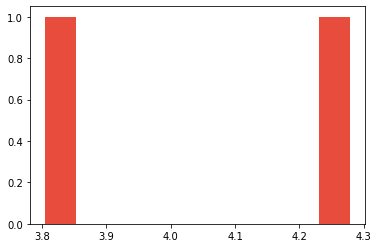

In [8]:
#sns.distplot( df_gas_expense["distance_per_liter"] ,color="skyblue", label="Distance per liter")
plt.hist(df_gas_expense['distance_per_liter'], color = "#e74c3c")
plt.show()

In [9]:
corr_matrix = df.corr()

In [10]:
corr_matrix

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,km_total,consume_liter_total,price_per_travel
distance,1.000000,-0.128967,0.562299,0.053597,0.088175,-0.053411,-0.025738,-0.019791,0.081120,0.104835,0.992101,-0.134209
consume,-0.128967,1.000000,-0.227866,0.027015,-0.320811,-0.015327,0.096591,0.248118,-0.170667,-0.350340,-0.052188,0.991185
speed,0.562299,-0.227866,1.000000,0.026817,0.015411,-0.097360,-0.035408,0.009489,0.081618,0.052585,0.551847,-0.238145
temp_inside,0.053597,0.027015,0.026817,1.000000,0.077181,-0.054426,0.125307,0.011845,0.060782,0.196601,0.056744,0.018048
temp_outside,0.088175,-0.320811,0.015411,0.077181,1.000000,0.148705,0.167562,-0.186315,0.346903,0.726316,0.037877,-0.298946
gas_type,-0.053411,-0.015327,-0.097360,-0.054426,0.148705,1.000000,0.105285,0.060328,0.022761,0.149905,-0.055348,0.114771
ac,-0.025738,0.096591,-0.035408,0.125307,0.167562,0.105285,1.000000,0.242915,0.088598,0.137562,-0.018700,0.110655
rain,-0.019791,0.248118,0.009489,0.011845,-0.186315,0.060328,0.242915,1.000000,-0.112650,-0.131158,0.009125,0.254082
sun,0.081120,-0.170667,0.081618,0.060782,0.346903,0.022761,0.088598,-0.112650,1.000000,0.273286,0.064247,-0.166437
km_total,0.104835,-0.350340,0.052585,0.196601,0.726316,0.149905,0.137562,-0.131158,0.273286,1.000000,0.054844,-0.328406


In [11]:
#df_gas[["consume", "gas_type"]].boxplot(by="gas_type")
#plt.show()

In [12]:
print(df.groupby(by='gas_type')['consume'].mean().round(2))

gas_type
0    4.93
1    4.90
Name: consume, dtype: float64


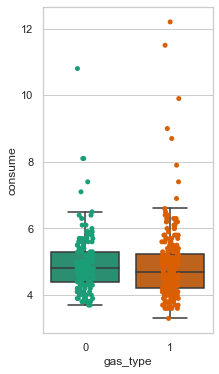

In [13]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')
fig = plt.figure(figsize=(14,6))

# gas_type
ax = fig.add_subplot(1,4,1)
sns.boxplot(x='gas_type', y='consume', data=df, showfliers=False, ax=ax)
sns.stripplot(x='gas_type', y='consume', data=df, jitter=True, ax=ax);

The data decrease as near as you get to right. So we'll work with the inverse in scatterplot of the relation consume - 1/distance:

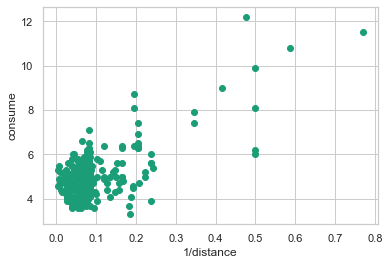

In [14]:
x = df["distance"].values
y = df["consume"].values

plt.scatter(np.reciprocal(x), y)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.show()

Linear regression:

In [15]:
x = np.reciprocal(x)
regr = LinearRegression()

x_train = x.reshape(-1,1)
regr.fit(x_train, y)

LinearRegression()

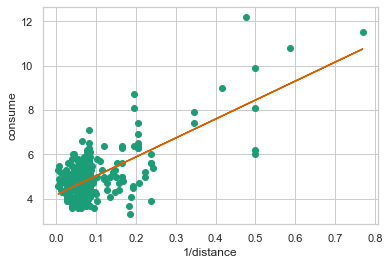

In [16]:
consume_pred = regr.intercept_ + regr.coef_[0] * x

plt.plot(x, y, "o")
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.plot(x, consume_pred)
plt.show()

We can't observe a clear linear relation between distance and consume

Distance vs km_total: How the the distances distributing during the full distance?

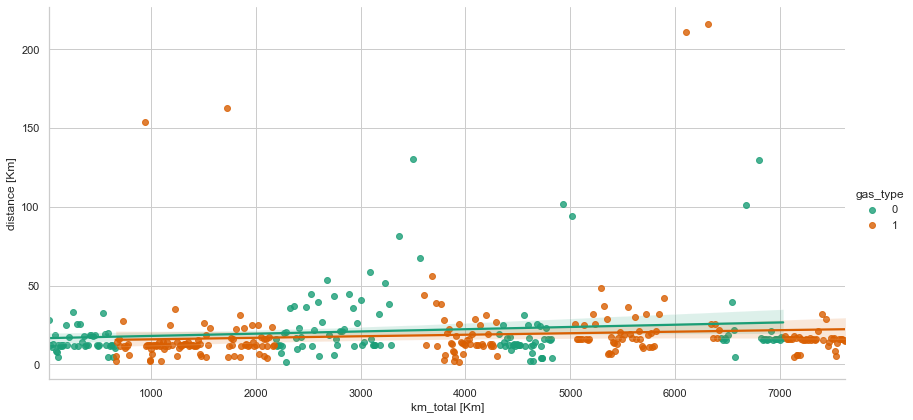

In [17]:
sns.lmplot(data=df,x='km_total',y='distance', hue='gas_type', height=6, aspect=2,)
plt.xlabel('km_total [Km]')
plt.ylabel('distance [Km]')
plt.show()

What about the correlation between the variables?

In [18]:
df.corr().consume.sort_values(ascending=False)

consume                1.000000
price_per_travel       0.991185
rain                   0.248118
ac                     0.096591
temp_inside            0.027015
gas_type              -0.015327
consume_liter_total   -0.052188
distance              -0.128967
sun                   -0.170667
speed                 -0.227866
temp_outside          -0.320811
km_total              -0.350340
Name: consume, dtype: float64

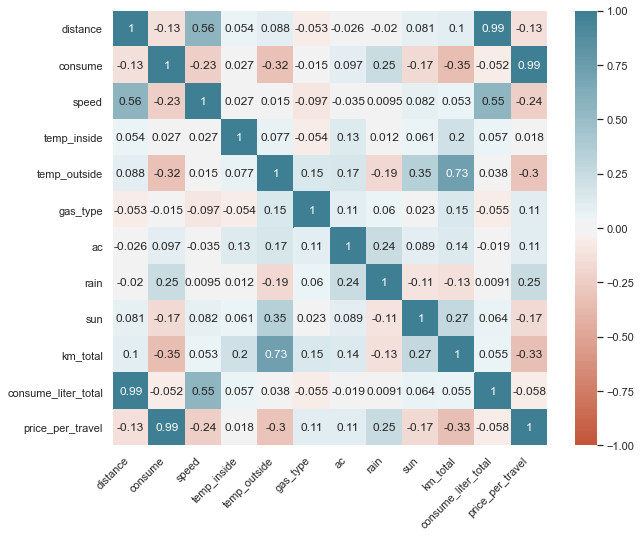

In [19]:
corr = df.corr()
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, 
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As we can see the most correlated variables are: distance-speed, distance-consume_liter_total, km_total-consnume, temp_outside-consume, speed consume-liter-total.

As the information about the relation between consume and distance is not really conclusive, we will filter the dataset in order to see what happens with the consume and the speed. We'll keep those cases where the consume is above 8 liters and the speed less than 30km/h:

In [20]:
df[(df.speed <= 30) & (df.consume > 8)]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,km_total,consume_liter_total,price_per_travel
45,2.0,9.9,21,21.5,4,1,0,0,0,664.3,0.1980,14.454
61,2.1,12.2,23,21.5,9,1,1,1,0,994.1,0.2562,17.812
112,5.1,8.7,21,23.5,5,1,0,0,0,1792.1,0.4437,12.702
147,1.7,10.8,14,21.5,10,0,0,1,0,2290.2,0.1836,14.904
206,2.4,9.0,26,20.0,10,1,0,0,0,3890.9,0.2160,13.140
210,1.3,11.5,21,20.0,10,1,0,0,0,3941.1,0.1495,16.790
254,2.0,8.1,20,22.5,14,0,0,0,0,4611.9,0.1620,11.178


There isn't too much information here neither. As we can see, those travels where speed is under 30 km/h we got consumes from 8 liters to more tahn twelve. If we see it more in detail we can conclude that those travels where we got a higher consume are those where the distances are minor, between 1 and 2.5 km.

### What about the outside temperature?

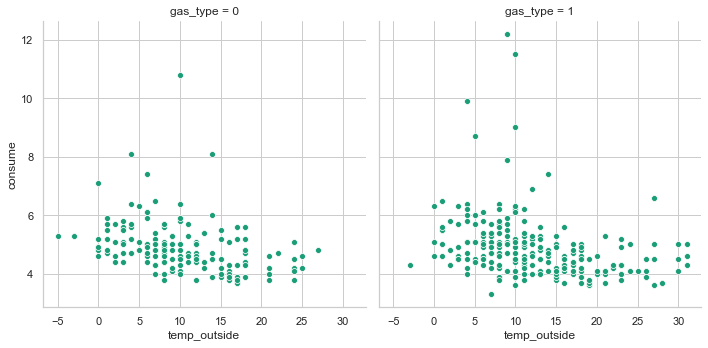

In [21]:
sns.relplot(data=df, x='temp_outside', y='consume', col='gas_type', kind='scatter');

#Remember gas_type=0 is SP98 and gas_type = 1 is E10

As we can see both distribution are very similar, although it seems that E10 has a consume a little higher. The correlation is negative, the major the outside temperature is, the minor is the consume.


### air conditioning vs consume:

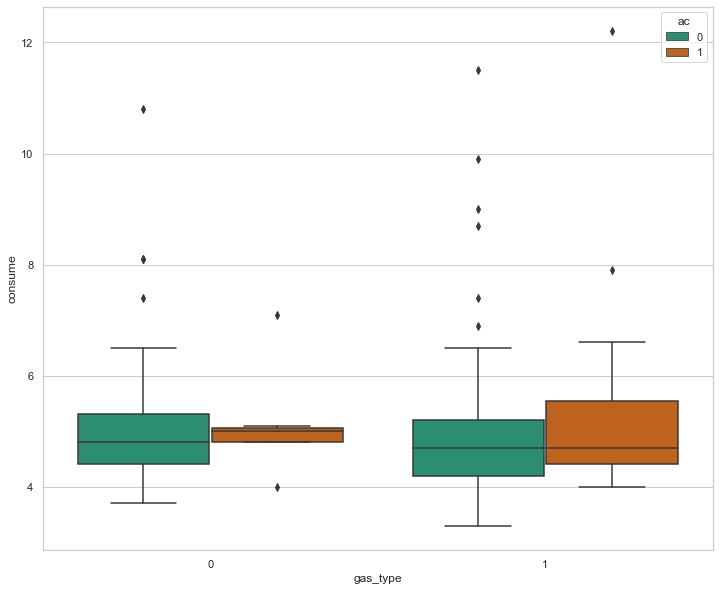

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df, x='gas_type', y='consume', hue='ac', ax=ax);

The only considerable difference in the previous plot occurs when the ac is on. The type SP98 has a bigger consume.Are there any outliers? Yes. We can observe several outliers in both gas types When consume is near 6.5-7 liters.


In [23]:
#Let's see more in detail what happens when consume is above 6.5 (filter):

df[(df.consume > 6.5) & (df.ac == 1)]


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,km_total,consume_liter_total,price_per_travel
60,2.9,7.9,18,21.5,9,1,1,1,0,992.0,0.2291,11.534
61,2.1,12.2,23,21.5,9,1,1,1,0,994.1,0.2562,17.812
181,12.3,7.1,52,22.5,0,0,1,1,0,3127.8,0.8733,9.798
373,15.3,6.6,16,24.0,27,1,1,0,0,7415.3,1.0098,9.636


As we see here when the distance is short and the outside temperature is low, the consume is higher.

#### temp_inside, sun and rain: after working on those variables I didn't see any remarkable information so I avoid the plots in order to obtain a more concise study.

### After comparing the independent variables with the variable to be predicted (consume), we can say that the gas type with the higher consume is E10 (altough is a little difference). The price difference per liter consumed is about 0.34 euro cents. This price difference may be no significant because

### Despite not having seen any very notable influence, we can say that those routes in which the distance is shorter, the speed is lower and the winter outside temperature, if the air conditioning is on, consume increases, the increase being greater for gas type E10. The consume increases too when there is no sun or when it rains, but the increase is hardly noticeable.

### The favorable price difference for E10, can be seen tainted by the higher consume of this gas type. We need to build a model to predict the consume of both gas types.
